In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model

from numpy import genfromtxt
from tensorflow.keras.optimizers import RMSprop


import cv2
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [3]:
Y=np.zeros((847,2))

for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  Y[i,:]=my_data

In [4]:
X_Dat=[]
x=0

for i in range(847):
  x=x+1  
  image = cv2.imread("C:/Users/dianu/Downloads/SM_I/SM_I"+str(i+1)+".png")# My reference Image
  X_Dat.append(image[60:288-60,204:432-60,:])

X_datnew=np.asarray(X_Dat)

In [5]:
from sklearn.utils import shuffle

X, Y = shuffle(X_datnew, Y)

In [6]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, :, :,:]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid,:, :,:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:,:, :,:]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 168, 168, 3) (592, 2)
(170, 168, 168, 3) (170, 2)
(85, 168, 168, 3) (85, 2)


In [2]:

img_input = layers.Input(shape=(168,168, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(2)(x)

model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 168, 168, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 166, 166, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 83, 83, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 81, 81, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0     

In [12]:
model.compile(loss='mse',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history=model.fit(X_train, y_train, epochs=300,
                    validation_data=(X_valid, y_valid))

Epoch 1/300
19/19 [==============================] - 2s 63ms/step - loss: 147950.5938 - acc: 0.5591 - val_loss: 183.7486 - val_acc: 0.6647
Epoch 2/300
19/19 [==============================] - 1s 57ms/step - loss: 58.2262 - acc: 0.5405 - val_loss: 5.8844 - val_acc: 0.6647
Epoch 3/300
19/19 [==============================] - 1s 57ms/step - loss: 3.3291 - acc: 0.6909 - val_loss: 2.2784 - val_acc: 0.8059
Epoch 4/300
19/19 [==============================] - 1s 57ms/step - loss: 4.1510 - acc: 0.7297 - val_loss: 3.9996 - val_acc: 0.7294
Epoch 5/300
19/19 [==============================] - 1s 57ms/step - loss: 6.2480 - acc: 0.7196 - val_loss: 1.7159 - val_acc: 0.7471
Epoch 6/300
19/19 [==============================] - 1s 57ms/step - loss: 4.3052 - acc: 0.7280 - val_loss: 3.1839 - val_acc: 0.7941
Epoch 7/300
19/19 [==============================] - 1s 57ms/step - loss: 4.6006 - acc: 0.7720 - val_loss: 11.2379 - val_acc: 0.6353
Epoch 8/300
19/19 [==============================] - 1s 57ms/step -

19/19 [==============================] - 1s 57ms/step - loss: 0.2422 - acc: 0.9645 - val_loss: 0.2549 - val_acc: 0.9647
Epoch 124/300
19/19 [==============================] - 1s 57ms/step - loss: 0.1432 - acc: 0.9764 - val_loss: 0.2811 - val_acc: 0.9706
Epoch 125/300
19/19 [==============================] - 1s 57ms/step - loss: 0.2026 - acc: 0.9747 - val_loss: 1.1786 - val_acc: 0.9824
Epoch 126/300
19/19 [==============================] - 1s 57ms/step - loss: 0.2129 - acc: 0.9848 - val_loss: 0.4223 - val_acc: 0.9647
Epoch 127/300
19/19 [==============================] - 1s 57ms/step - loss: 0.1727 - acc: 0.9662 - val_loss: 0.6792 - val_acc: 0.9824
Epoch 128/300
19/19 [==============================] - 1s 56ms/step - loss: 0.1955 - acc: 0.9780 - val_loss: 0.3459 - val_acc: 0.9824
Epoch 129/300
19/19 [==============================] - 1s 57ms/step - loss: 0.2022 - acc: 0.9764 - val_loss: 0.3674 - val_acc: 0.9647
Epoch 130/300
19/19 [==============================] - 1s 56ms/step - loss: 

19/19 [==============================] - 1s 57ms/step - loss: 0.0542 - acc: 0.9764 - val_loss: 2.8460 - val_acc: 0.9588
Epoch 246/300
19/19 [==============================] - 1s 57ms/step - loss: 0.2904 - acc: 0.9764 - val_loss: 0.3542 - val_acc: 0.9706
Epoch 247/300
19/19 [==============================] - 1s 57ms/step - loss: 0.0862 - acc: 0.9865 - val_loss: 0.2897 - val_acc: 0.9588
Epoch 248/300
19/19 [==============================] - 1s 56ms/step - loss: 0.0865 - acc: 0.9814 - val_loss: 0.2610 - val_acc: 0.9647
Epoch 249/300
19/19 [==============================] - 1s 56ms/step - loss: 0.0633 - acc: 0.9780 - val_loss: 0.3328 - val_acc: 0.9647
Epoch 250/300
19/19 [==============================] - 1s 57ms/step - loss: 0.1349 - acc: 0.9679 - val_loss: 0.3942 - val_acc: 0.9765
Epoch 251/300
19/19 [==============================] - 1s 57ms/step - loss: 0.0777 - acc: 0.9814 - val_loss: 0.3246 - val_acc: 0.9647
Epoch 252/300
19/19 [==============================] - 1s 57ms/step - loss: 

Text(0.5, 1.0, 'Training and validation loss')

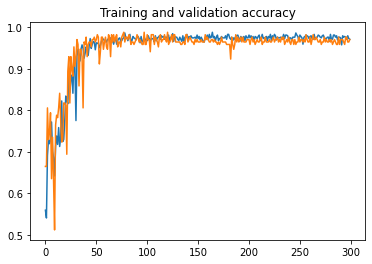

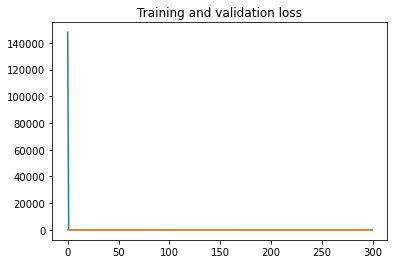

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [14]:
y_predictim=model.predict(X_test)

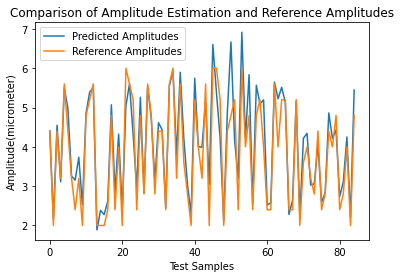

In [15]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

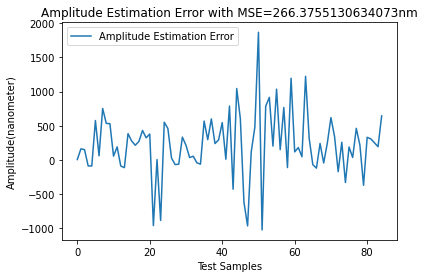

In [17]:
from sklearn.metrics import mean_squared_error
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

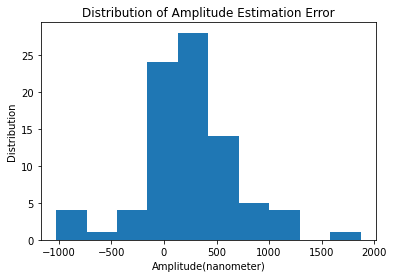

In [18]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

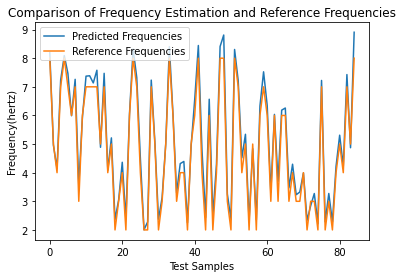

In [19]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

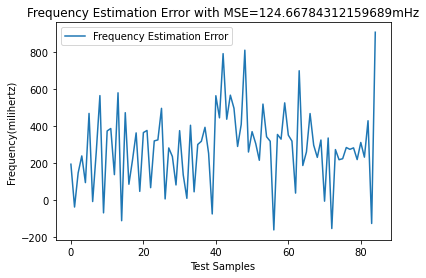

In [20]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

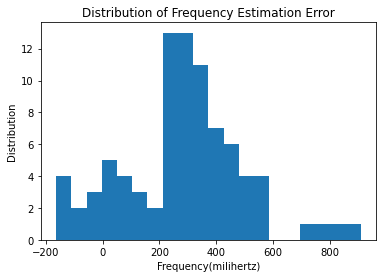

In [21]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()
